In [3]:
import re
import pandas as pd
import matplotlib.pyplot as plt

/Users/i.pile/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Распарсить файл с энергиями

In [4]:
path1 = '/Users/i.pile/Downloads/energies_vs_parameters/W2_log_files/W2_1.000000_energies.txt'
def parse_path(path):
    lst = []
    with open(path) as f:
        for line in f:
            if 'convergence_treshold' in line:
                dct = {
                    'W': float(re.findall(r'(?<=W=)[\d\.]+', line)[0]),
                    'L': float(re.findall(r'(?<=L=)[\d\.]+', line)[0]),
                    'Nup': float(re.findall(r'(?<=Nup =)[\d\.]+', line)[0]),
                    'Ndown': float(re.findall(r'(?<=Ndown = )[\d\.]+', line)[0]),
                    'time': float(re.findall(r'(?<=time: )[\d\.]+', line)[0]),
                    't_up': float(re.findall(r'(?<=t_up = )[\d\.]+', line)[0]),
                    't_down': float(re.findall(r'(?<=t_down = )[\d\.]+', line)[0]),
                    'convergence_threshold': float(re.findall(r'(?<=convergence_treshold = )[\d\.]+', line)[0]),
                    'cutoff': float(re.findall(r'(?<=cutoff = )[\d\.]+', line)[0])
                }
                lst.append(dct)
    return pd.DataFrame(lst)

In [5]:
df_w1 = parse_path(path1)

In [6]:
df_w05 = parse_path('/Users/i.pile/Downloads/energies_vs_parameters/W2_05_log_files/W2_0.500000_energies.txt')
df_w03 = parse_path('/Users/i.pile/Downloads/energies_vs_parameters/W2_03_log_files/W2_0.300000_energies.txt')

In [7]:
df_w03

,W,L,Nup,Ndown,time,t_up,t_down,convergence_threshold,cutoff
0,2.0,80.0,10.0,10.0,430.0,1.0,0.3,1.000000e-08,1.000000e-01
1,2.0,80.0,10.0,10.0,953.0,1.0,0.3,1.000000e-08,1.000000e-02
2,2.0,80.0,10.0,10.0,39311.0,1.0,0.3,1.000000e-08,1.000000e-03
3,2.0,80.0,10.0,10.0,278538.0,1.0,0.3,1.000000e-08,1.000000e-04
4,2.0,80.0,10.0,10.0,823756.0,1.0,0.3,1.000000e-08,1.000000e-06
5,2.0,80.0,10.0,10.0,854556.0,1.0,0.3,1.000000e-08,1.000000e-07
6,2.0,80.0,10.0,10.0,958495.0,1.0,0.3,1.000000e-08,1.000000e-05
7,2.0,80.0,10.0,10.0,1074150.0,1.0,0.3,1.000000e-08,1.000000e-08


In [8]:
import numpy as np

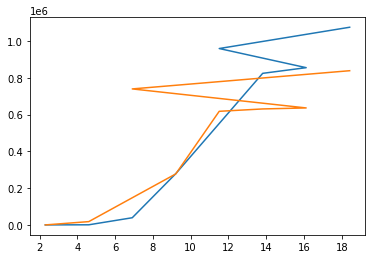

In [11]:
# time(cutoff)


plt.plot(-np.log(df_w03.cutoff), df_w03.time)
plt.plot(-np.log(df_w05.cutoff), df_w05.time)

## Распарсить данные по свипам

In [12]:
path = '/Users/i.pile/Downloads/energies_vs_parameters/W2_log_files/W2_log_files/out_1559461.log'

def parse_sweeps(path):
    energies, entropies, linkdims, trunc_errors, times, changes = [],[],[],[],[],[]
    with open(path) as f:
            for line in f:
                if 'Energy after sweep' in line:
                    energies.append(float(re.findall(r'-?\d+\.\d+', line)[0]))
                if 'vN Entropy at center bond' in line:
                    entropies.append(float(re.findall(r'-?\d+\.\d+', line)[0]))     
                if 'Largest link dim' in line:
                    linkdims.append(float(re.findall(r'(?<=was )-?\d+\.?\d*', line)[0]))  
                if 'Largest truncation error:' in line:
                    trunc_errors.append(float(re.findall(r'-?\d+\.?\d*', line)[0]))  
                if 'CPU time' in line:
                    times.append(re.findall(r'(?<=CPU time = ).+', line)[0])  
                if 'Energy change' in line:
                    changes.append(float(re.findall(r'-?\d+\.\d+', line)[0]))
                
    df = pd.DataFrame({
        'energies': energies, 
        'entropies': entropies, 
        'linkdims': linkdims, 
        'trunc_errors': trunc_errors, 
        'times': times, 
        'changes': changes})
    df['cpu_time'] = df['times'].apply(lambda x: float(x.split('s')[0]))
    df['wall_time'] = df['times'].apply(lambda x: float(x.split('= ')[1].split('s')[0]))
    return df

In [13]:
df = parse_sweeps(path)

In [14]:
df

,energies,entropies,linkdims,trunc_errors,times,changes,cpu_time,wall_time
0,-30.651862,-0.0,10.0,0.014525,0.143s (Wall time = 0.150s),-30.651862,0.143,0.150
1,-32.392089,-0.0,20.0,0.002837,0.317s (Wall time = 0.329s),-1.740227,0.317,0.329
2,-33.076884,-0.0,30.0,0.000894,0.442s (Wall time = 0.466s),-0.684795,0.442,0.466
3,-33.619454,-0.0,29.0,0.000770,0.513s (Wall time = 0.527s),-0.542570,0.513,0.527
4,-34.076103,-0.0,28.0,0.000910,0.533s (Wall time = 0.538s),-0.456649,0.533,0.538
5,-34.368172,-0.0,23.0,0.000992,0.507s (Wall time = 0.511s),-0.292069,0.507,0.511
6,-34.631869,-0.0,19.0,0.000790,0.496s (Wall time = 0.498s),-0.263697,0.496,0.498
7,-34.795803,-0.0,15.0,0.000908,0.486s (Wall time = 0.490s),-0.163934,0.486,0.490
8,-34.943289,-0.0,15.0,0.000809,0.493s (Wall time = 0.497s),-0.147486,0.493,0.497
9,-35.098102,-0.0,15.0,0.000825,0.479s (Wall time = 0.481s),-0.154813,0.479,0.481


# Как зависит время от типа задачки:

In [15]:
path1 = '/Users/i.pile/Downloads/energies_vs_parameters/W2_log_files/W2_log_files/out_1559480.log'
df1 = parse_sweeps(path1)

In [16]:
path2 = '/Users/i.pile/Downloads/energies_vs_parameters/W2_05_log_files/W2_05_log_files/out_1559493.log'
df2 = parse_sweeps(path2)

In [17]:
path3 = '/Users/i.pile/Downloads/energies_vs_parameters/W2_03_log_files/W2_03_log_files/out_1559509.log'
df3 = parse_sweeps(path3)

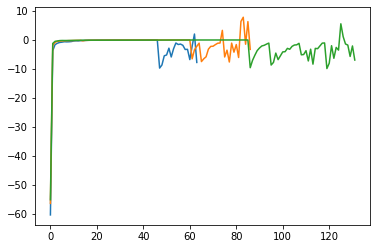

In [22]:
plt.plot(df1.changes)
plt.plot(df2.changes)
plt.plot(df3.changes)